In [ ]:
# Crash Data Analysis - Starter Code
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

# Read each CSV file separately
df_crash_summary = pd.read_csv("18ee2911-992f-40ed-b6ae-e756859786e6.csv")
df_casualty_details = pd.read_csv("177dc50c-0cf7-46ba-8a69-99695aeaa46a.csv")
df_driver_info = pd.read_csv("dd13a889-2a48-4b91-8c64-59f824ed3d2c.csv")

# Print the first few rows of each DataFrame
print("Crash Summary Data:")
print(df_crash_summary.head(), "\n")

print("Casualty Details Data:")
print(df_casualty_details.head(), "\n")

print("Driver Information Data:")
print(df_driver_info.head())


Crash Summary Data:
   _id  Crash_Year Crash_Police_Region Crash_Severity Involving_Drink_Driving  \
0    1        2001            Brisbane          Fatal                      No   
1    2        2001            Brisbane          Fatal                      No   
2    3        2001            Brisbane          Fatal                      No   
3    4        2001            Brisbane          Fatal                     Yes   
4    5        2001            Brisbane          Fatal                     Yes   

  Involving_Driver_Speed Involving_Fatigued_Driver  \
0                     No                        No   
1                     No                        No   
2                    Yes                        No   
3                     No                        No   
4                     No                        No   

  Involving_Defective_Vehicle  Count_Crashes  Count_Fatality  \
0                          No             25              25   
1                         Yes           

In [4]:
def inspect_df(df, name):
    print(f"--- {name} ---")
    print("Data Types:")
    print(df.dtypes, "\n")
    
    print("Missing Values:")
    print(df.isnull().sum(), "\n")
    
    print("Duplicates Count:")
    print(df.duplicated().sum(), "\n")
    
    print("Head of DataFrame:")
    print(df.head(), "\n")
    
# Inspect each DataFrame
inspect_df(df_crash_summary, "Crash Summary Data")
inspect_df(df_casualty_details, "Casualty Details Data")
inspect_df(df_driver_info, "Driver Information Data")

--- Crash Summary Data ---
Data Types:
_id                             int64
Crash_Year                      int64
Crash_Police_Region            object
Crash_Severity                 object
Involving_Drink_Driving        object
Involving_Driver_Speed         object
Involving_Fatigued_Driver      object
Involving_Defective_Vehicle    object
Count_Crashes                   int64
Count_Fatality                  int64
Count_Hospitalised              int64
Count_Medically_Treated         int64
Count_Minor_Injury              int64
Count_All_Casualties            int64
dtype: object 

Missing Values:
_id                            0
Crash_Year                     0
Crash_Police_Region            0
Crash_Severity                 0
Involving_Drink_Driving        0
Involving_Driver_Speed         0
Involving_Fatigued_Driver      0
Involving_Defective_Vehicle    0
Count_Crashes                  0
Count_Fatality                 0
Count_Hospitalised             0
Count_Medically_Treated        0
C

In [5]:
# Descriptive statistics for numerical columns
print("Crash Summary Data Statistics:")
print(df_crash_summary.describe(), "\n")

print("Casualty Details Data Statistics:")
print(df_casualty_details.describe(), "\n")

print("Driver Information Data Statistics:")
print(df_driver_info.describe(), "\n")


Crash Summary Data Statistics:
               _id   Crash_Year  Count_Crashes  Count_Fatality  \
count  5172.000000  5172.000000    5172.000000     5172.000000   
mean   2586.500000  2010.755027      76.156032        1.271075   
std    1493.172127     6.626842     236.618460        4.848945   
min       1.000000  2001.000000       1.000000        0.000000   
25%    1293.750000  2005.000000       2.000000        0.000000   
50%    2586.500000  2010.000000       7.000000        0.000000   
75%    3879.250000  2016.000000      25.000000        0.000000   
max    5172.000000  2023.000000    2190.000000       59.000000   

       Count_Hospitalised  Count_Medically_Treated  Count_Minor_Injury  \
count         5172.000000              5172.000000         5172.000000   
mean            29.260441                31.723511           16.836620   
std            146.068031               180.503913           82.492356   
min              0.000000                 0.000000            0.000000   
25% 

In [6]:
# Distribution of Crash Severity in Crash Summary Data
print("Crash Severity Distribution:")
print(df_crash_summary['Crash_Severity'].value_counts(), "\n")

# Total casualties by age group in Casualty Details Data
print("Total Casualties by Age Group:")
casualty_age_distribution = df_casualty_details.groupby('Casualty_AgeGroup')['Casualty_Count'].sum()
print(casualty_age_distribution, "\n")



# 'Crash_Severity', 'Involving_Male_Driver', 'Involving_Female_Driver',
# 'Involving_Senior_Driver_60plus', 'Involving_Provisional_Driver', 'Involving_Unlicensed_Driver'
# and the count column 'Count_Crashes'



# --- 1. Define a function to assign a mutually exclusive driver category.
def assign_driver_category(row):
    # Define priority order: Unlicensed > Provisional > Senior > Female > Male
    if row['Involving_Unlicensed_Driver'] == 'Yes':
        return 'Unlicensed'
    elif row['Involving_Provisional_Driver'] == 'Yes':
        return 'Provisional'
    elif row['Involving_Overseas_Licensed_Driver'] == 'Yes':
        return 'OverseasLicensed '
    elif row['Involving_Senior_Driver_60plus'] == 'Yes':
        return 'Senior'
    elif row['Involving_Young_Driver_16-24'] == 'Yes':
        return 'Young_driver'
    elif row['Involving_Female_Driver'] == 'Yes':
        return 'Female'
    elif row['Involving_Male_Driver'] == 'Yes':
        return 'Male'
    else:
        return 'No Specific Driver Category'

# --- 2. Apply the function to create a new column in the DataFrame.
df_driver_info['Driver_Category'] = df_driver_info.apply(assign_driver_category, axis=1)

# --- 3. Group the data by Crash Severity and the new Driver Category,
# summing the Count_Crashes for each combination.
grouped = df_driver_info.groupby(['Crash_Severity', 'Driver_Category'])['Count_Crashes'].sum().unstack(fill_value=0)






Crash Severity Distribution:
Crash_Severity
Hospitalisation         1385
Medical treatment       1187
Minor injury            1045
Fatal                    902
Property damage only     653
Name: count, dtype: int64 

Total Casualties by Age Group:
Casualty_AgeGroup
0 to 16        28660
17 to 24       93261
25 to 29       44120
30 to 39       70590
40 to 49       59091
50 to 59       44655
60 to 74       34524
75 and over    13156
Unknown         2674
Name: Casualty_Count, dtype: int64 



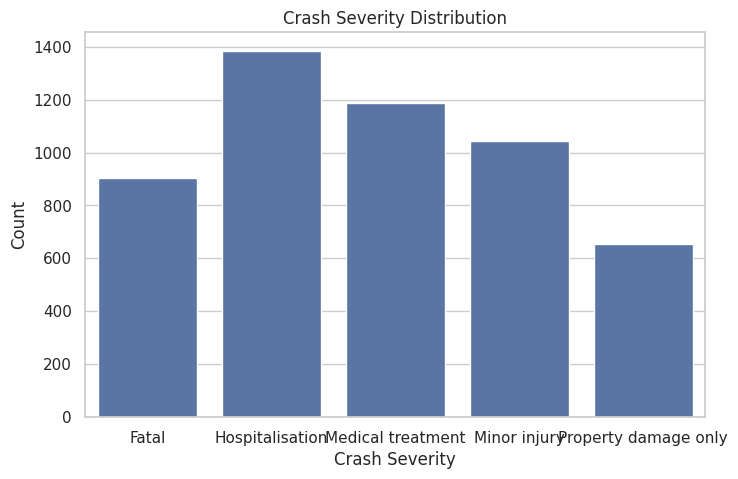

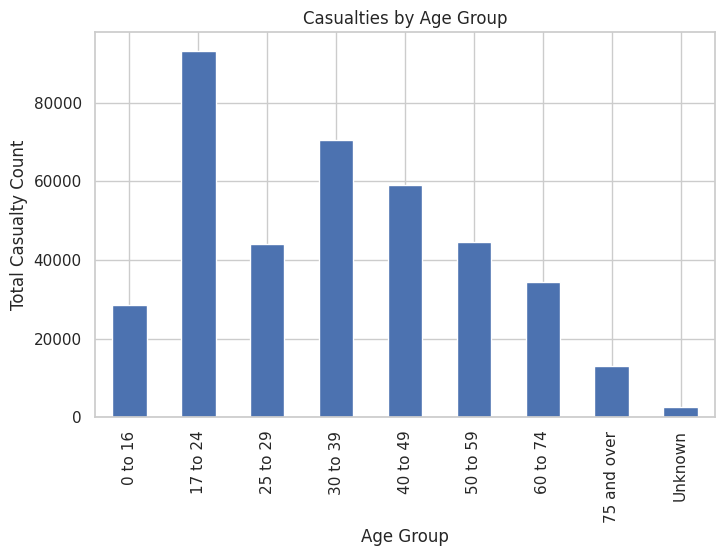

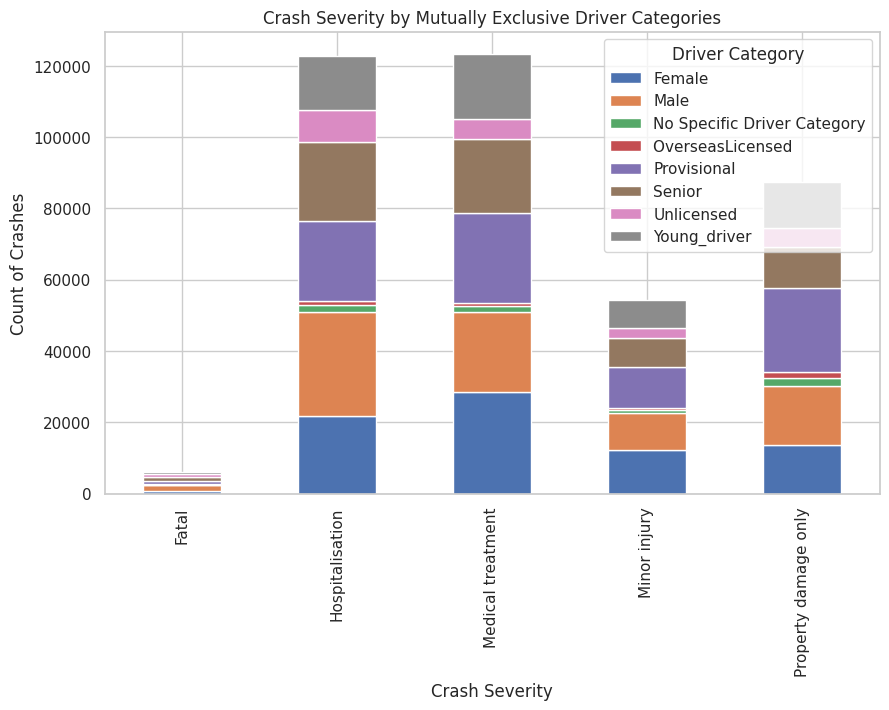

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crash Severity Distribution Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df_crash_summary, x='Crash_Severity')
plt.title('Crash Severity Distribution')
plt.xlabel('Crash Severity')
plt.ylabel('Count')
plt.show()

# Casualties by Age Group Plot
plt.figure(figsize=(8, 5))
casualty_age_distribution.plot(kind='bar')
plt.title('Casualties by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Casualty Count')
plt.show()

# --- 4. Plot the mutually exclusive groups as a stacked bar chart.
grouped.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Crash Severity by Mutually Exclusive Driver Categories")
plt.xlabel("Crash Severity")
plt.ylabel("Count of Crashes")
plt.legend(title="Driver Category")
plt.show()




In [31]:
# Step 1: Rename _id to Crash_ID
df_crash_summary.rename(columns={'_id': 'Crash_ID'}, inplace=True)
df_driver_info.rename(columns={'_id': 'Crash_ID'}, inplace=True)
df_casualty_details.rename(columns={'_id': 'Crash_ID'}, inplace=True)

# Step 2: Create fact_crash
fact_crash = df_crash_summary[[
    'Crash_ID', 'Crash_Year', 'Crash_Police_Region', 'Crash_Severity',
    'Count_Crashes', 'Count_Fatality', 'Count_Hospitalised',
    'Count_Medically_Treated', 'Count_Minor_Injury',
    'Involving_Drink_Driving', 'Involving_Driver_Speed',
    'Involving_Fatigued_Driver', 'Involving_Defective_Vehicle'
]].copy()

# Step 3: Assign Primary Reason
def assign_primary_reason(row):
    if row['Involving_Drink_Driving'] == 'Yes':
        return 'Drink Driving'
    elif row['Involving_Driver_Speed'] == 'Yes':
        return 'Driver Speed'
    elif row['Involving_Fatigued_Driver'] == 'Yes':
        return 'Fatigued Driver'
    elif row['Involving_Defective_Vehicle'] == 'Yes':
        return 'Defective Vehicle'
    else:
        return 'Other Reasons'

fact_crash['Primary_Reason'] = fact_crash.apply(assign_primary_reason, axis=1)

# Step 4: Add driver flags from driver info
fact_crash = fact_crash.merge(df_driver_info[[
    'Crash_ID', 'Involving_Male_Driver', 'Involving_Female_Driver',
    'Involving_Senior_Driver_60plus', 'Involving_Provisional_Driver', 'Involving_Overseas_Licensed_Driver',
    'Involving_Young_Driver_16-24' ,
    'Involving_Unlicensed_Driver'
]], on='Crash_ID', how='left')

# Step 5: Assign Driver Category
def assign_driver_category(row):
    if row['Involving_Unlicensed_Driver'] == 'Yes':
        return 'Unlicensed'
    elif row['Involving_Provisional_Driver'] == 'Yes':
        return 'Provisional'
    elif row['Involving_Overseas_Licensed_Driver'] == 'Yes':
        return 'OverseasLicensed '
    elif row['Involving_Senior_Driver_60plus'] == 'Yes':
        return 'Senior'
    elif row['Involving_Young_Driver_16-24'] == 'Yes':
        return 'Young_driver'
    elif row['Involving_Female_Driver'] == 'Yes':
        return 'Female'
    elif row['Involving_Male_Driver'] == 'Yes':
        return 'Male'
    else:
        return 'NotCategorised'

fact_crash['Driver_Category'] = fact_crash.apply(assign_driver_category, axis=1)

# Step 6: Create Dimension Tables
df_primary_reason_dim = fact_crash[['Primary_Reason']].drop_duplicates().reset_index(drop=True)
df_primary_reason_dim.index.name = 'Primary_Reason_ID'
df_primary_reason_dim.reset_index(inplace=True)

df_driver_cat_dim = fact_crash[['Driver_Category']].drop_duplicates().reset_index(drop=True)
df_driver_cat_dim.index.name = 'Driver_Category_ID'
df_driver_cat_dim.reset_index(inplace=True)

df_location_dim = fact_crash[['Crash_Police_Region']].drop_duplicates().reset_index(drop=True)
df_location_dim.index.name = 'Location_ID'
df_location_dim.reset_index(inplace=True)
df_location_dim.rename(columns={'Crash_Police_Region': 'Location'}, inplace=True)

df_driver_dim = df_driver_info.drop_duplicates().reset_index(drop=True)
df_driver_dim.index.name = 'Driver_ID'
df_driver_dim.reset_index(inplace=True)

df_casualty_dim = df_casualty_details.drop_duplicates().reset_index(drop=True)
df_casualty_dim.index.name = 'Casualty_ID'
df_casualty_dim.reset_index(inplace=True)

# Step 7: Replace values in fact_crash with IDs
fact_crash = fact_crash.merge(df_primary_reason_dim, on='Primary_Reason', how='left').drop(columns=['Primary_Reason'])
fact_crash = fact_crash.merge(df_driver_cat_dim, on='Driver_Category', how='left').drop(columns=['Driver_Category'])
fact_crash = fact_crash.merge(df_location_dim, left_on='Crash_Police_Region', right_on='Location', how='left') \
                       .drop(columns=['Crash_Police_Region', 'Location'])

# Optional: Link Crash_ID to driver and casualty tables
fact_crash = fact_crash.merge(df_driver_dim[['Crash_ID']], on='Crash_ID', how='left')  # Can keep Driver_ID if needed
fact_crash = fact_crash.merge(df_casualty_dim[['Crash_ID']], on='Crash_ID', how='left')  # Can keep Casualty_ID if needed

# ✅ Now fact_crash is fully normalized

# Preview output
print("FACT TABLE:")
print(fact_crash.head(), "\n")

print("DIM - Primary Reason:")
print(df_primary_reason_dim, "\n")

print("DIM - Driver Category:")
print(df_driver_cat_dim, "\n")

print("DIM - Location:")
print(df_location_dim, "\n")

print("DIM - Driver Info:")
print(df_driver_dim.head(), "\n")

print("DIM - Casualty Info:")
print(df_casualty_dim.head(), "\n")


FACT TABLE:
   Crash_ID  Crash_Year Crash_Severity  Count_Crashes  Count_Fatality  \
0         1        2001          Fatal             25              25   
1         2        2001          Fatal              1               1   
2         3        2001          Fatal              8               8   
3         4        2001          Fatal              2               2   
4         5        2001          Fatal              1               1   

   Count_Hospitalised  Count_Medically_Treated  Count_Minor_Injury  \
0                   6                        4                   2   
1                   0                        0                   0   
2                   5                        0                   0   
3                   0                        0                   0   
4                   3                        0                   0   

  Involving_Drink_Driving Involving_Driver_Speed  ... Involving_Male_Driver  \
0                      No                     No 

In [50]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Rebuild fact_enriched from scratch
fact_enriched = fact_crash.copy()

# Merge dimensions
fact_enriched = fact_enriched.merge(df_primary_reason_dim, on='Primary_Reason_ID')
fact_enriched = fact_enriched.merge(df_driver_cat_dim, on='Driver_Category_ID')
fact_enriched = fact_enriched.merge(df_location_dim, on='Location_ID')

# Add enriched driver info
fact_enriched = fact_enriched.merge(
    df_driver_dim[[
        'Crash_ID',
        'Involving_Male_Driver',
        'Involving_Female_Driver',
        'Involving_Young_Driver_16-24',
        'Involving_Senior_Driver_60plus',
        'Involving_Provisional_Driver',
        'Involving_Overseas_Licensed_Driver',
        'Involving_Unlicensed_Driver',
        'Count_Casualty_Fatality'
    ]],
    on='Crash_ID', how='left'
)

# Add enriched casualty info
fact_enriched = fact_enriched.merge(
    df_casualty_dim[[
        'Crash_ID',
        'Casualty_Severity',
        'Casualty_AgeGroup',
        'Casualty_Gender',
        'Casualty_Road_User_Type',
        'Casualty_Count'
    ]],
    on='Crash_ID', how='left'
)

# Set theme
sns.set_theme(style="whitegrid")

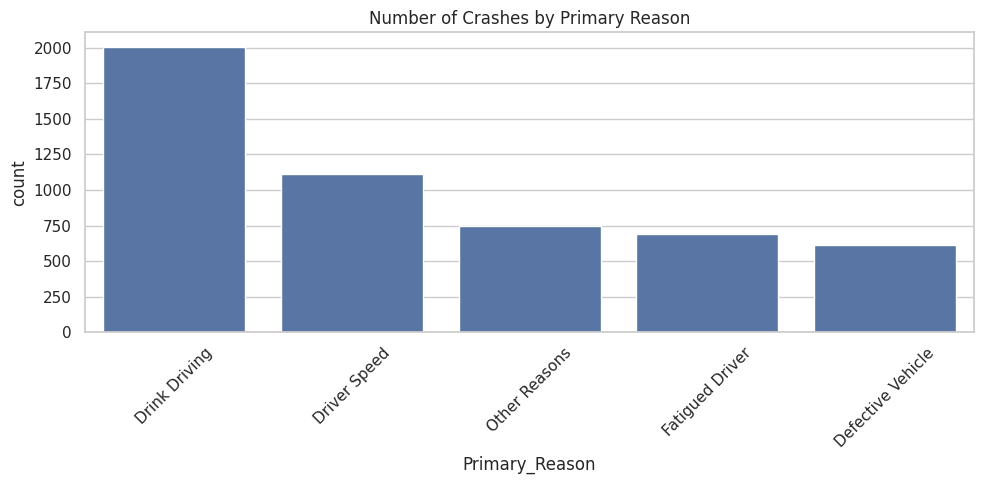

In [51]:
# 1.Crashes by Primary Reason
plt.figure(figsize=(10, 5))
sns.countplot(data=fact_enriched, x='Primary_Reason', order=fact_enriched['Primary_Reason'].value_counts().index)
plt.title('Number of Crashes by Primary Reason')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

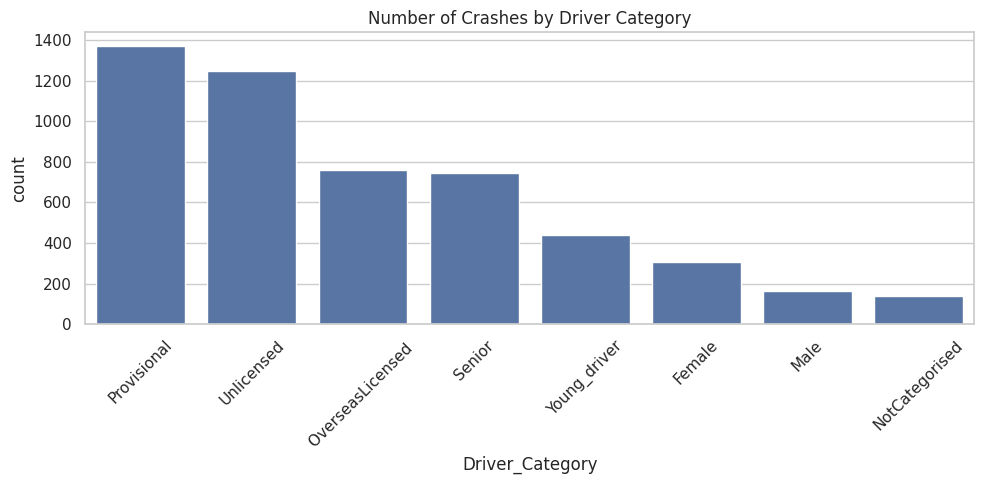

In [34]:
# 2. 👮‍♂️ Crashes by Driver Category
plt.figure(figsize=(10, 5))
sns.countplot(data=fact_enriched, x='Driver_Category', order=fact_enriched['Driver_Category'].value_counts().index)
plt.title('Number of Crashes by Driver Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

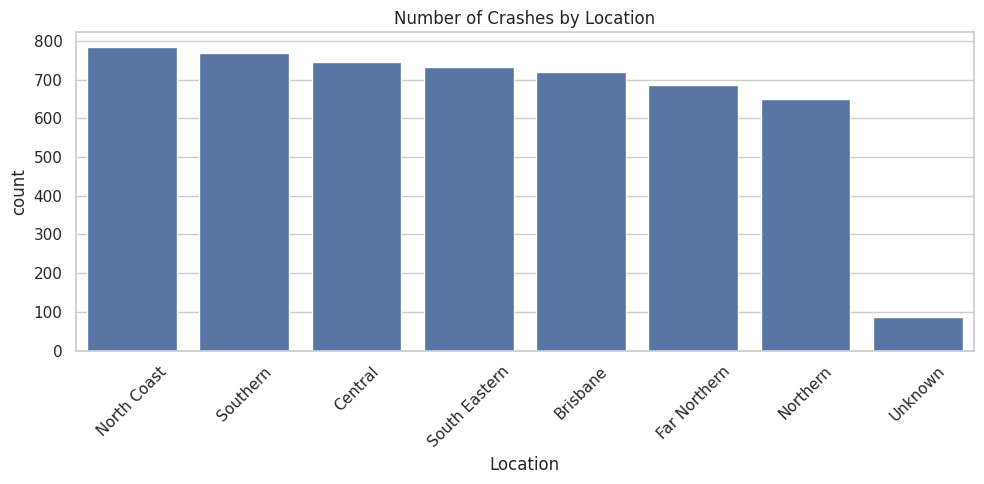

In [52]:
# 3. 📍 Crashes by Location
plt.figure(figsize=(10, 5))
sns.countplot(data=fact_enriched, x='Location', order=fact_enriched['Location'].value_counts().index)
plt.title('Number of Crashes by Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

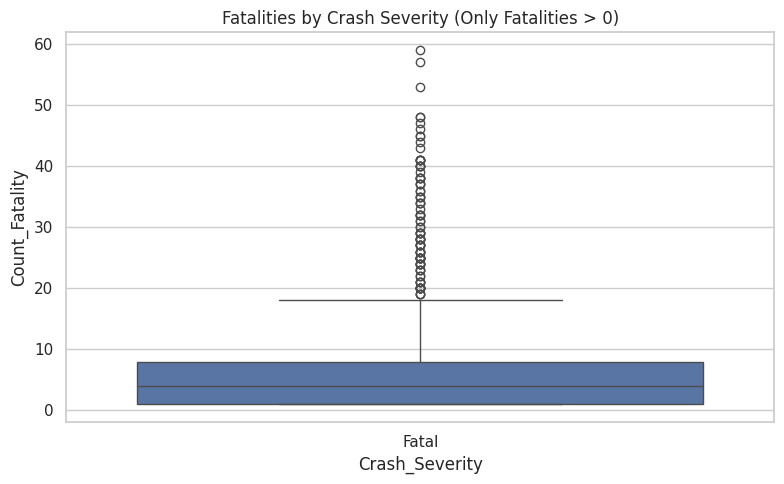

In [53]:
# Filter out non-fatal crashes for clearer visualization
plt.figure(figsize=(8, 5))
sns.boxplot(data=fact_enriched[fact_enriched['Count_Fatality'] > 0], 
            x='Crash_Severity', y='Count_Fatality')
plt.title('Fatalities by Crash Severity (Only Fatalities > 0)')
plt.tight_layout()
plt.show()


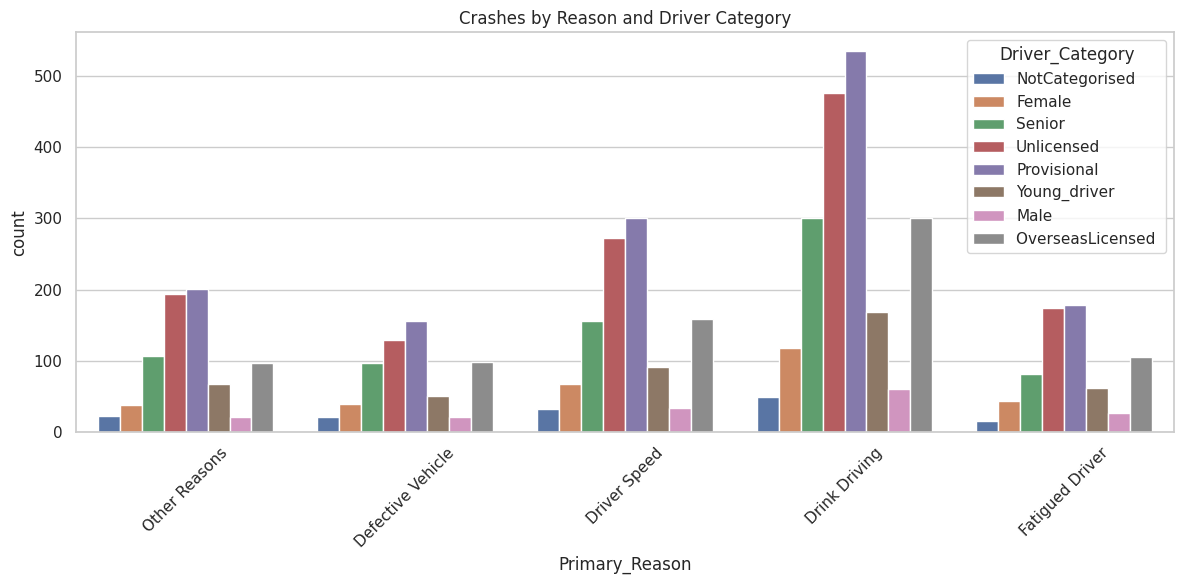

In [55]:
# 5. 🚗 Crash Count by Primary Reason + Driver Category
plt.figure(figsize=(12, 6))
sns.countplot(data=fact_enriched, x='Primary_Reason', hue='Driver_Category')
plt.title('Crashes by Reason and Driver Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
# Step 1: Copy the fact table
fact_enriched = fact_crash.copy()

# Step 2: Merge primary dimensions
fact_enriched = fact_enriched.merge(df_primary_reason_dim, on='Primary_Reason_ID')
fact_enriched = fact_enriched.merge(df_driver_cat_dim, on='Driver_Category_ID')
fact_enriched = fact_enriched.merge(df_location_dim, on='Location_ID')

# Step 3: Merge enriched driver features
fact_enriched = fact_enriched.merge(
    df_driver_dim[[
        'Crash_ID',
        'Involving_Male_Driver',
        'Involving_Female_Driver',
        'Involving_Young_Driver_16-24',
        'Involving_Senior_Driver_60plus',
        'Involving_Provisional_Driver',
        'Involving_Overseas_Licensed_Driver',
        'Involving_Unlicensed_Driver',
        'Count_Casualty_Fatality'
    ]],
    on='Crash_ID', how='left'
)

# Step 4: Merge enriched casualty features
fact_enriched = fact_enriched.merge(
    df_casualty_dim[[
        'Crash_ID',
        'Casualty_Severity',
        'Casualty_AgeGroup',
        'Casualty_Gender',
        'Casualty_Road_User_Type',
        'Casualty_Count'
    ]],
    on='Crash_ID', how='left'
)


/tmp/ipykernel_4898/3798021636.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_4898/3798021636.py:21: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


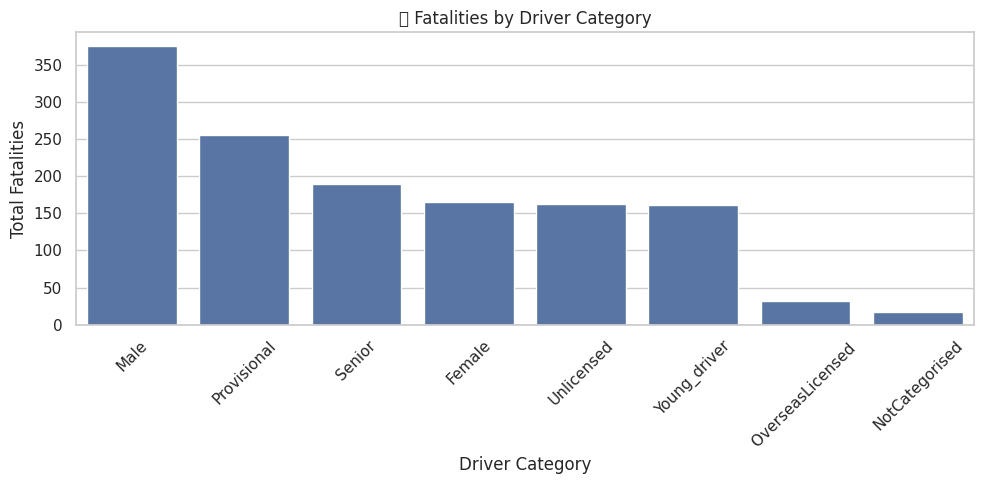

In [56]:
# Set theme
sns.set_theme(style="whitegrid")

# Ensure enriched data exists
story_df = fact_enriched.copy()

# 1. 📌 Which Driver Category is Most Dangerous? (Fatalities vs Category)
plt.figure(figsize=(10, 5))
sns.barplot(
    data=story_df,
    x='Driver_Category',
    y='Count_Casualty_Fatality',
    estimator=sum,
    ci=None,
    order=story_df.groupby('Driver_Category')['Count_Casualty_Fatality'].sum().sort_values(ascending=False).index
)
plt.title('🚨 Fatalities by Driver Category')
plt.ylabel('Total Fatalities')
plt.xlabel('Driver Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_4898/1334383635.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


<Axes: xlabel='Casualty_AgeGroup', ylabel='Casualty_Count'>

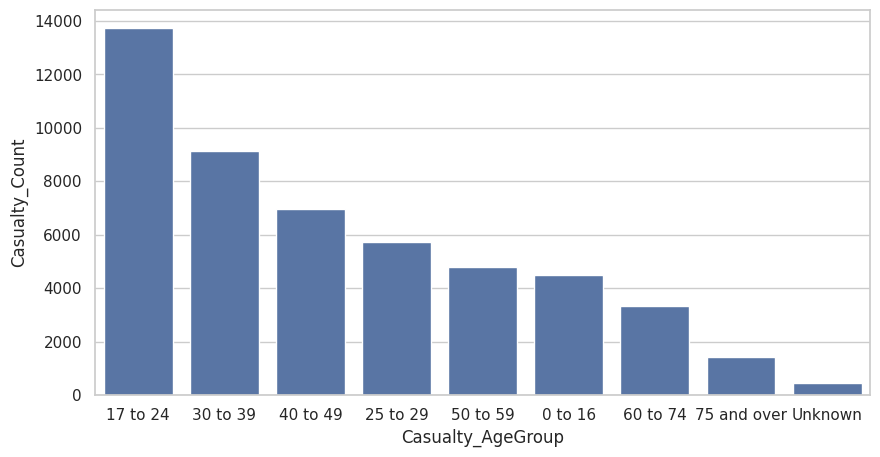

In [42]:
# 2. 🧒 Who Are the Most Affected? (Casualty Count by Age Group)
plt.figure(figsize=(10, 5))
sns.barplot(
    data=story_df,
    x='Casualty_AgeGroup',
    y='Casualty_Count',
    estimator=sum,
    ci=None,
    order=story_df.groupby('Casualty_AgeGroup')['Casualty_Count'].sum().sort_values(ascending=False).index
)

/tmp/ipykernel_4898/1022135531.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_4898/1022135531.py:15: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


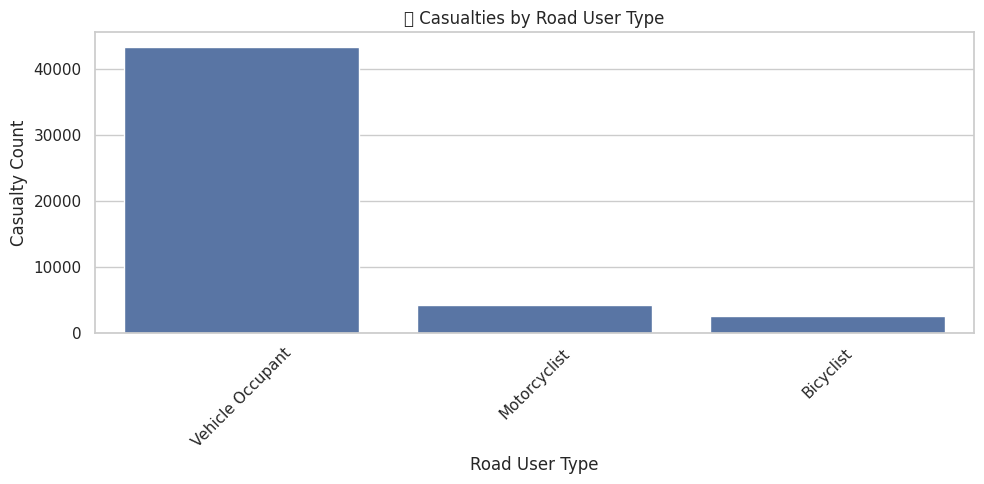

In [57]:
# 3. 🧍 Road User Type vs Casualty Count
plt.figure(figsize=(10, 5))
sns.barplot(
    data=story_df,
    x='Casualty_Road_User_Type',
    y='Casualty_Count',
    estimator=sum,
    ci=None,
    order=story_df.groupby('Casualty_Road_User_Type')['Casualty_Count'].sum().sort_values(ascending=False).index
)
plt.title('🚗 Casualties by Road User Type')
plt.ylabel('Casualty Count')
plt.xlabel('Road User Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

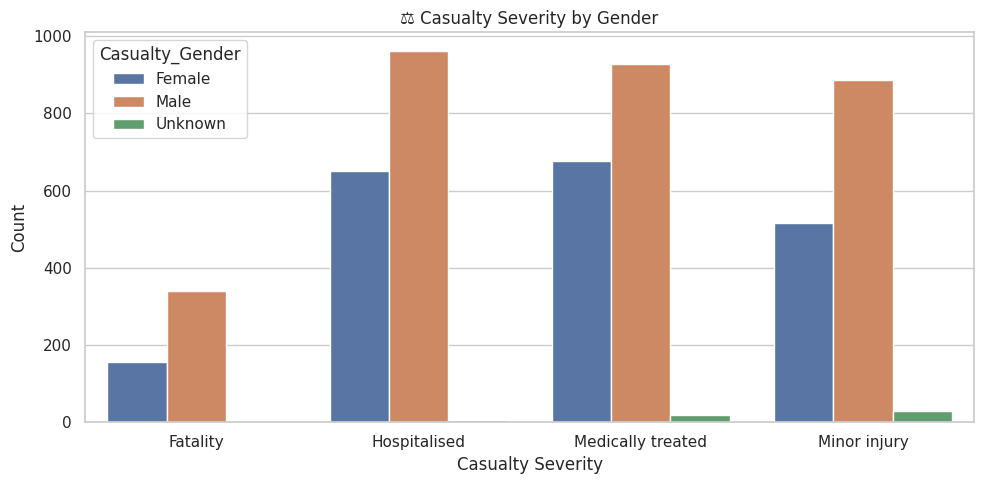

In [58]:
# 4. 🧠 Severity of Casualties by Gender
plt.figure(figsize=(10, 5))
sns.countplot(
    data=story_df,
    x='Casualty_Severity',
    hue='Casualty_Gender'
)
plt.title('⚖️ Casualty Severity by Gender')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [59]:
# Step 1: Check the column names
print(fact_enriched.columns)

# Step 2: If you see 'Crash_Police_Region', rename it
fact_enriched.rename(columns={'Crash_Police_Region': 'Location'}, inplace=True)


Index(['Crash_ID', 'Crash_Year', 'Crash_Severity', 'Count_Crashes',
       'Count_Fatality', 'Count_Hospitalised', 'Count_Medically_Treated',
       'Count_Minor_Injury', 'Involving_Drink_Driving',
       'Involving_Driver_Speed', 'Involving_Fatigued_Driver',
       'Involving_Defective_Vehicle', 'Involving_Male_Driver_x',
       'Involving_Female_Driver_x', 'Involving_Senior_Driver_60plus_x',
       'Involving_Provisional_Driver_x',
       'Involving_Overseas_Licensed_Driver_x',
       'Involving_Young_Driver_16-24_x', 'Involving_Unlicensed_Driver_x',
       'Primary_Reason_ID', 'Driver_Category_ID', 'Location_ID',
       'Primary_Reason', 'Driver_Category', 'Location',
       'Involving_Male_Driver_y', 'Involving_Female_Driver_y',
       'Involving_Young_Driver_16-24_y', 'Involving_Senior_Driver_60plus_y',
       'Involving_Provisional_Driver_y',
       'Involving_Overseas_Licensed_Driver_y', 'Involving_Unlicensed_Driver_y',
       'Count_Casualty_Fatality', 'Casualty_Severity', 'Cas

/tmp/ipykernel_4898/3453943356.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_4898/3453943356.py:17: UserWarning: Glyph 128679 (\N{CONSTRUCTION SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128679 (\N{CONSTRUCTION SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


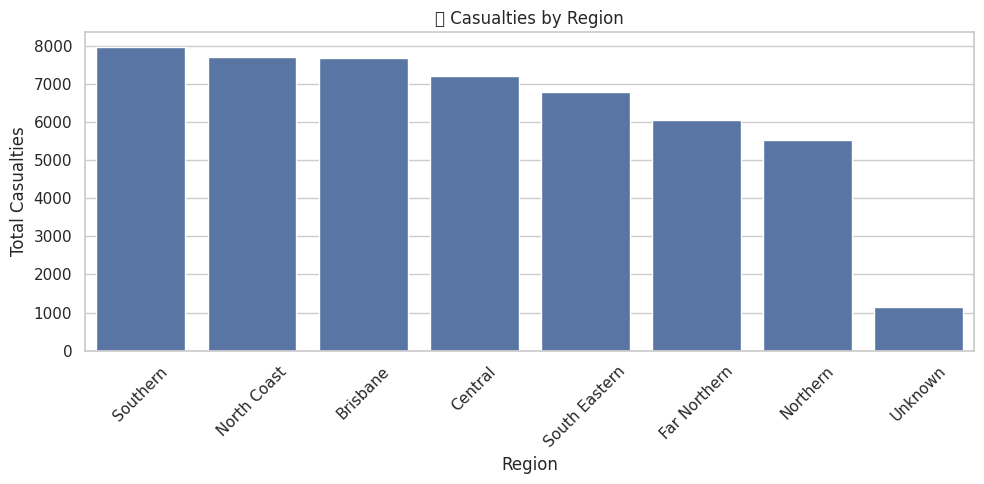

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(
    data=fact_enriched,
    x='Location',
    y='Casualty_Count',
    estimator=sum,
    ci=None,
    order=fact_enriched.groupby('Location')['Casualty_Count'].sum().sort_values(ascending=False).index
)
plt.title('🚧 Casualties by Region')
plt.xlabel('Region')
plt.ylabel('Total Casualties')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_4898/3951474832.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/tmp/ipykernel_4898/3951474832.py:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


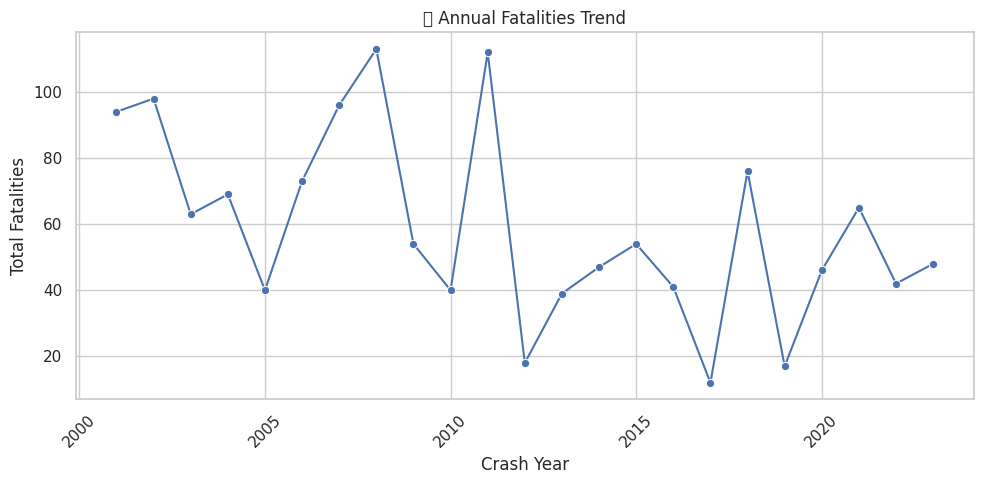

In [62]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=fact_enriched,
    x='Crash_Year',
    y='Count_Casualty_Fatality',
    estimator='sum',
    ci=None,
    marker='o'
)
plt.title('📈 Annual Fatalities Trend')
plt.xlabel('Crash Year')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_4898/2208378452.py:17: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


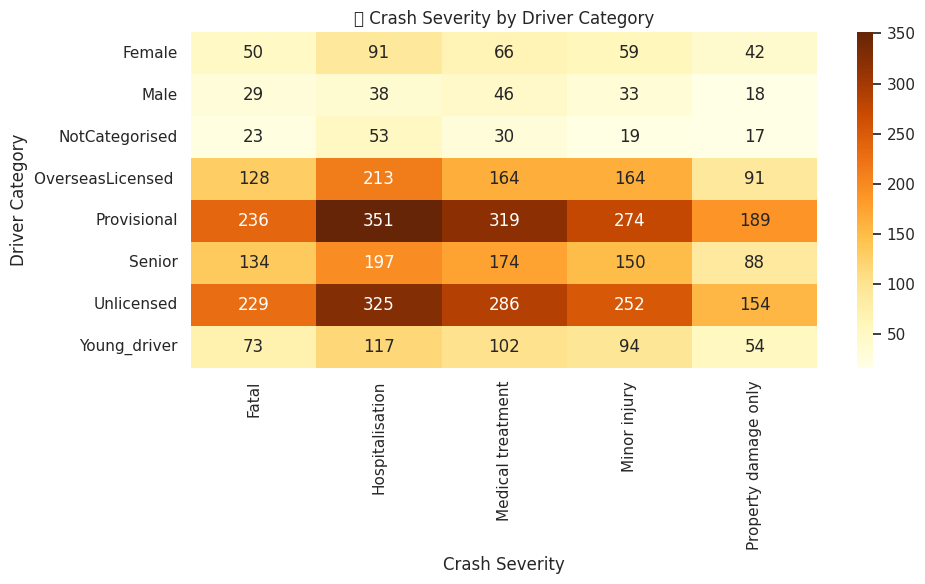

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tab of counts
severity_driver_ct = pd.crosstab(
    fact_enriched['Driver_Category'],
    fact_enriched['Crash_Severity']
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(severity_driver_ct, annot=True, fmt='d', cmap='YlOrBr')
plt.title('🔥 Crash Severity by Driver Category')
plt.xlabel('Crash Severity')
plt.ylabel('Driver Category')
plt.tight_layout()
plt.show()


In [64]:
fact_enriched['Impact_Score'] = (
    fact_enriched['Count_Casualty_Fatality'] * 3 +  # Fatalities weigh more
    fact_enriched['Casualty_Count']                # All casualties count
)


/tmp/ipykernel_4898/1646228868.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipykernel_4898/1646228868.py:14: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


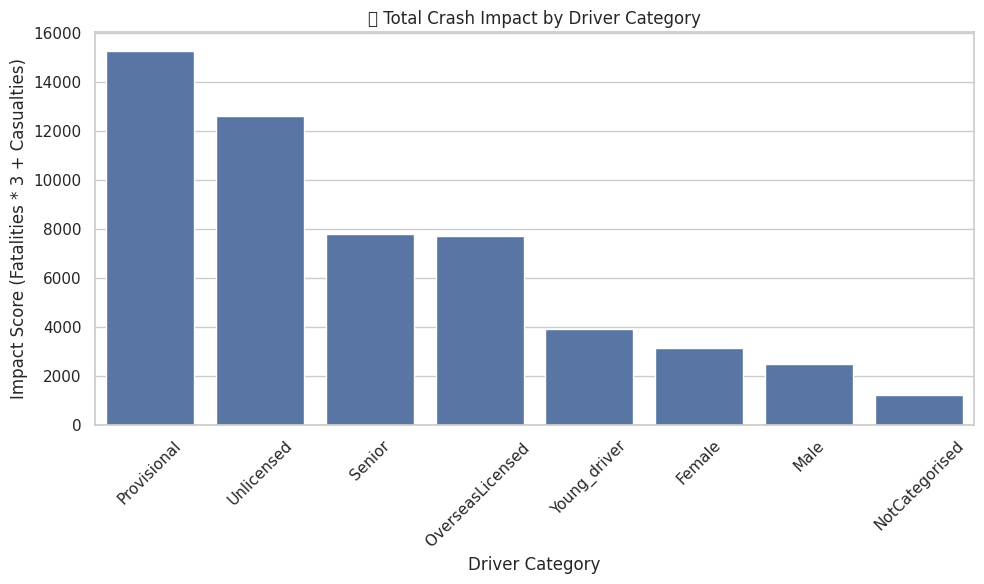

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=fact_enriched,
    x='Driver_Category',
    y='Impact_Score',
    estimator=sum,
    ci=None,
    order=fact_enriched.groupby('Driver_Category')['Impact_Score'].sum().sort_values(ascending=False).index
)
plt.title('💥 Total Crash Impact by Driver Category')
plt.xlabel('Driver Category')
plt.ylabel('Impact Score (Fatalities * 3 + Casualties)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [66]:
fact_enriched.to_csv("crash_data.csv", index=False)

print("✅ crash_data.csv saved successfully!")

✅ crash_data.csv saved successfully!
